# [Week 4] PyTorch

In this lab session, we are going to cover the basics of PyTorch Framework, next let's implement a linear model and train it with PyTorch

## Why PyTorch?

- A popular deep learning framework
- Ease of use, flexibility, efficient memory usage, intuitive and concise code
- Python-like coding, high compatibility with Numpy

![picture](https://www.assemblyai.com/blog/content/images/2023/01/percentage_repo_2023.png)

## PyTorch and Numpy

PyTorch provides a data structure called **tensor**, which is almost the same with NumPy\
(Also it supports GPU acceleration, look into this later)

In [ ]:
import torch
import numpy as np

torch.__version__

'2.0.1+cu118'

### PyTorch tensor and NumPy array

In [ ]:
np_array = np.array([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])
print(np_array)

torch_tensor = torch.tensor([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])
print(torch_tensor)

[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]
tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])


In [ ]:
numpy_to_torch = torch.tensor(np_array)
print(numpy_to_torch)

torch_to_numpy = numpy_to_torch.numpy()
print(torch_to_numpy)

tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])
[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]


### Same operations with same grammer

In [ ]:
# numpy
print(np_array.shape)

# torch
print(torch_tensor.shape)
print(torch_tensor.size())

(2, 2, 2)
torch.Size([2, 2, 2])
torch.Size([2, 2, 2])


In [ ]:
# numpy
np_array_ones = np.ones_like(np_array)
print(np_array_ones)
print(np_array_ones.shape)

# torch
torch_tensor_ones = torch.ones_like(torch_tensor)
print(torch_tensor_ones)
print(torch_tensor_ones.size())

[[[1 1]
  [1 1]]

 [[1 1]
  [1 1]]]
(2, 2, 2)
tensor([[[1, 1],
         [1, 1]],

        [[1, 1],
         [1, 1]]])
torch.Size([2, 2, 2])


In [ ]:
# numpy
np_array_1, np_array_2 = np.array([1, 2]), np.array([3, 4])
print(np_array_1 + np_array_2)

# torch
torch_tensor_1, torch_tensor_2 = torch.tensor([1, 2]), torch.tensor([3, 4])
print(torch_tensor_1 + torch_tensor_2)

[4 6]
tensor([4, 6])


In [ ]:
# numpy
print(np_array_1@np_array_2 , np.matmul(np_array_1, np_array_2))

# torch
print(torch_tensor_1@torch_tensor_2, torch.matmul(torch_tensor_1, torch_tensor_2))

11 11
tensor(11) tensor(11)


### Same operations with different grammer

In [ ]:
# numpy
np_concat = np.concatenate([np_array, np_array_ones], axis=0)
print(np_concat)
print(np_concat.shape)

# torch
torch_concat= torch.cat([torch_tensor, torch_tensor_ones], dim=0)
print(torch_concat)
print(torch_concat.size())

[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]

 [[1 1]
  [1 1]]

 [[1 1]
  [1 1]]]
(4, 2, 2)
tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]],

        [[1, 1],
         [1, 1]],

        [[1, 1],
         [1, 1]]])
torch.Size([4, 2, 2])


In [ ]:
# numpy
np_reshaped = np_concat.reshape(4, -1)
print (np_reshaped)
print (np_reshaped.shape)

# torch
torch_reshaped = torch_concat.view(4, -1)
print (torch_reshaped)
print (torch_reshaped.shape)

[[1 2 3 4]
 [5 6 7 8]
 [1 1 1 1]
 [1 1 1 1]]
(4, 4)
tensor([[1, 2, 3, 4],
        [5, 6, 7, 8],
        [1, 1, 1, 1],
        [1, 1, 1, 1]])
torch.Size([4, 4])


In [ ]:
# numpy
np_clone = np_reshaped.copy()
print(np_clone)

# torch
torch_clone = torch_reshaped.clone()
print(torch_clone)

[[1 2 3 4]
 [5 6 7 8]
 [1 1 1 1]
 [1 1 1 1]]
tensor([[1, 2, 3, 4],
        [5, 6, 7, 8],
        [1, 1, 1, 1],
        [1, 1, 1, 1]])


### PyTorch for NumPy users
For more examples, see [here](https://github.com/wkentaro/pytorch-for-numpy-users).

## Tensor operations under GPU utilization

Deep learning framework driving the successful machine learning utilizes high-performance GPU to accelarate its computation.

Let's learn how to utilize GPU in PyTorch

Check the hardware accelerator for your Colab!\
**Runtime -> Change runtime type -> T4 GPU (Hardware accelerator)**

In [ ]:
# current GPU usages in your Colab
!nvidia-smi

Sat Sep 16 15:23:29 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P0    27W /  70W |    601MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# could you access GPU?
print(torch.cuda.is_available())

True


In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
device
#cuda 사용 가능하면 cuda로 아니면 cpu 사용

device(type='cuda')

In [ ]:
# on CPU
a = torch.ones(3)
b = torch.rand(3)

print(a, a.device)
print(b, b.device)

tensor([1., 1., 1.]) cpu
tensor([0.2328, 0.4251, 0.2071]) cpu


In [ ]:
c = a + b

print(c, c.device)

tensor([1.2071, 1.6297, 1.3653]) cpu


In [ ]:
# to GPU
a = a.to('cuda')
b = b.to('cuda')

print(a, a.device)
print(b, b.device)

tensor([1., 1., 1.], device='cuda:0') cuda:0
tensor([0.2071, 0.6297, 0.3653], device='cuda:0') cuda:0


In [ ]:
c = a + b

print(c, c.device)

tensor([1.2071, 1.6297, 1.3653], device='cuda:0') cuda:0


In [ ]:
# back to CPU
c = c.to('cpu')

print(c, c.device)

tensor([1.2071, 1.6297, 1.3653]) cpu


## Autograd (Automatic Differentiation)

Most machine learning (or deep learning) frameworks train your model by optimizing it through gradient descent (a first-order iterative optimization algorithm).\
For this, PyTorch provides ```torch.autograd``` to automatic differentiate for all operations on PyTorch tensors.

Let's see this with some examples.

### Get gradient

If the `.requires_grad` of `torch.tensor` is `True`, all operations on it are ready to be tracked.

In [ ]:
x = torch.tensor([[1., 2., 3.], [4., 5., 6.]], requires_grad=True)
y = torch.ones_like(x, requires_grad=True)

print(x)
print(y)

tensor([[1., 2., 3.],
        [4., 5., 6.]], requires_grad=True)
tensor([[1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)


`grad_fn` references the operation creating the tensor.

In [ ]:
z = x + y
print(z)
print(z.grad_fn)

tensor([[2., 3., 4.],
        [5., 6., 7.]], grad_fn=<AddBackward0>)


In [ ]:
z = z ** 2
print(z)

tensor([[ 4.,  9., 16.],
        [25., 36., 49.]], grad_fn=<PowBackward0>)


In [ ]:
o = z.mean()
print(o)

tensor(23.1667, grad_fn=<MeanBackward0>)


In [ ]:
x.retain_grad()
y.retain_grad()
z.retain_grad()

o.backward()
#backward => o 계산하고 전거 계산

Slightly abuse notation by denoting the matrices, vectors as equal.

$\nabla_{z}o = \frac{\partial o}{\partial z} = \frac{\partial}{\partial z}\frac{1}{6}\sum_{i,j} z_{ij}=\frac{1}{6}$\
$\nabla_{x}o = \frac{\partial o}{\partial x} = \frac{\partial o}{\partial z}\cdot\frac{\partial z}{\partial x} = \frac{1}{6}\cdot\frac{\partial}{\partial x}(x+y)^2 = \frac{1}{3}(x+y) = \frac{x_{ij}+y_{ij}}{3}$\
$\nabla_{y}o = \frac{\partial o}{\partial y} = \frac{\partial o}{\partial z}\cdot\frac{\partial z}{\partial y} = \frac{1}{6}\cdot\frac{\partial}{\partial y}(x+y)^2 = \frac{x_{ij}+y_{ij}}{3}$

In [ ]:
print("gradient w.r.t. z = ", z.grad)
print("gradient w.r.t. x = ", x.grad)
print("gradient w.r.t. y = ", y.grad)

gradient w.r.t. z =  tensor([[0.1667, 0.1667, 0.1667],
        [0.1667, 0.1667, 0.1667]])
gradient w.r.t. x =  tensor([[0.6667, 1.0000, 1.3333],
        [1.6667, 2.0000, 2.3333]])
gradient w.r.t. y =  tensor([[0.6667, 1.0000, 1.3333],
        [1.6667, 2.0000, 2.3333]])


### With ```torch.no_grad()```



When you evaluate your model, no need to compute gradient. To prevent tracking and back propagation, you can also wrap the code block in with `torch.no_grad()`

In [ ]:
with torch.no_grad():
    x = torch.tensor([[1., 2., 3.], [4., 5., 6.]], requires_grad=True)
    y = torch.ones_like(x, requires_grad=True)
    y = x + y
    z = y ** 2
    out = z.mean()

In [ ]:
out

tensor(23.1667)

In [ ]:
out.requires_grad

False

In [ ]:
out.backward()
#torch.no_grad()통해서 tracking 안됨 (역으로 계산 안됨)

NameError: ignored

## `nn.module` Neural Network Modules

`torch.nn.module` is the base class for all neural network modules in PyTorch.\
Simply saying, `nn.module` class represents a parametric function.\
Do you remember the `class inheritance` that we learned in the previous lab session (Python Basics)? A child class created from a parent class can get the parent's attribute and call its method.\
Due to `nn.module`, you can use many useful methods without defining.


### Using pre-defined modules

In [ ]:
import torch.nn as nn

X = torch.tensor([[1., 2., 3.], [4., 5., 6.]], requires_grad=True)
print (X.shape)

torch.Size([2, 3])


In [ ]:
# Y = XW^T + b; input dim 3, output dim 1
linear_fn = nn.Linear(3, 1)
linear_fn

Linear(in_features=3, out_features=1, bias=True)

You can use `nn.module` object as it is a function.

In [ ]:
Y = linear_fn(X)  # Y=XW^T+b 계산한 결과 저장
print(Y)
print(Y.shape) # batch_size * output_dim

Y = Y.mean()

tensor([[1.6578],
        [3.3611]], grad_fn=<AddmmBackward0>)
torch.Size([2, 1])


In [ ]:
Y.backward()
print(X.grad)

tensor([[ 0.1603, -0.1458,  0.2693],
        [ 0.1603, -0.1458,  0.2693]])


You can use other types of `nn.Module` in PyTorch
- nn.linear
- nn.Conv2d
- nn.RNN
- nn.LSTM
- nn.GRU
- nn.Transformer

### Design a neural network

In [ ]:
class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MLP, self).__init__()
        self.linear_1 = nn.Linear(input_dim, hidden_dim)
        self.linear_2 = nn.Linear(hidden_dim, output_dim)
        self.relu = nn.ReLU()
    def forward(self, x):
        x = self.linear_1(x)
        x = self.relu(x) # Activation function
        x = self.linear_2(x)
        return x

**Activation function**
- nn.ReLU, nn.Sigmoid, nn.Tanh, ...
- They make non-linearity for deep neural networks $ Y = \sigma_1(W_1 * \sigma_2(W_2 * \cdots \sigma_N(W_N * X)\cdots))$.
- Deep neural networks can approximate complex functions. Without activation functions, a multi linear layer network is just a linear model $ Y = W_1 * W_2 * \cdots * W_N * X = W_{N+1} X$.

![picture](https://www.baeldung.com/wp-content/uploads/sites/4/2022/04/activations.png)

### The parameters of the network

In [ ]:
model = MLP(3, 4, 1)

In [ ]:
for p in model.parameters():
    print(p)

Parameter containing:
tensor([[ 0.1077,  0.4384,  0.1485],
        [ 0.3063, -0.4466,  0.4110],
        [ 0.1987,  0.1462,  0.0798],
        [ 0.2814,  0.5303, -0.1285]], requires_grad=True)
Parameter containing:
tensor([-0.3216, -0.1453, -0.3519,  0.2777], requires_grad=True)
Parameter containing:
tensor([[-0.2471, -0.2668,  0.4314,  0.4575]], requires_grad=True)
Parameter containing:
tensor([0.0575], requires_grad=True)


In [ ]:
model.state_dict()

OrderedDict([('linear_1.weight',
              tensor([[ 0.1077,  0.4384,  0.1485],
                      [ 0.3063, -0.4466,  0.4110],
                      [ 0.1987,  0.1462,  0.0798],
                      [ 0.2814,  0.5303, -0.1285]])),
             ('linear_1.bias', tensor([-0.3216, -0.1453, -0.3519,  0.2777])),
             ('linear_2.weight',
              tensor([[-0.2471, -0.2668,  0.4314,  0.4575]])),
             ('linear_2.bias', tensor([0.0575]))])

## Exercise (Train your model)

![picture](https://www.baeldung.com/wp-content/uploads/sites/4/2022/04/artificial_neuron-1024x539.png)

We will now implement a linear regression model. \
We haven't learn about regression yet (we will learn about it in a later lab session), but don't worry, you will be able to solve this exercise even without understanding the concepts of regression.

In this exercise, we will train a linear model approximating the following function:
\begin{align*}
y=x^3-6x^2+11x-6
\end{align*}
However, the linear model is:
\begin{align*}
\hat{y}=w_1*x_1 + w_2*x_2 + w_3*x_3 + b,
\end{align*}
where $W=[w_1 w_2 w_3]$ is weights, and $b$ is the bias.

How are you going to train the model?


**Load packages**

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

import numpy as np
import matplotlib.pyplot as plt
import random

seed = 7
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed(seed)

**Generate data**

The follow is the function we want to approximate.

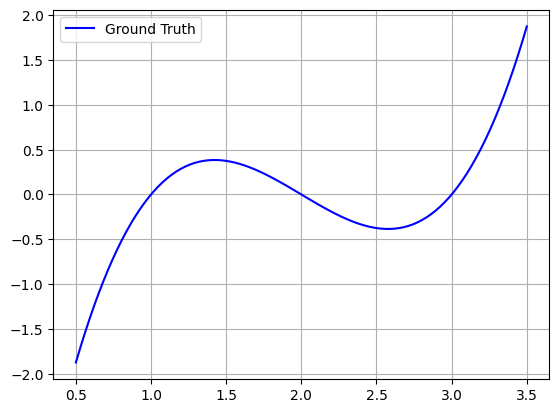

In [2]:
x = np.linspace(0.5, 3.5, 100)
y = x**3 - 6*x**2 + 11*x - 6

plt.plot(x, y, color='blue', label='Ground Truth')
plt.grid()
plt.legend()
plt.show()

**Linear model**

In [3]:
class LinearModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        out = self.linear(x)
        return out

### **Exercise 1**. construct an appropriate model for this exercise.

In [4]:
model = LinearModel(3, 1)

### **Exercise 2**. How should you create input data for your linear model? your linear model

In [5]:
x_1 = x
x_2 = x_1**2
x_3 = x_1**3

x_for_model = np.array([x_1, x_2, x_3]).T
#print(x_for_model)
class CustomDataset(Dataset):
    def __init__(self, x, y):
        self.x_data = torch.FloatTensor(x)
        self.y_data = torch.FloatTensor(y.reshape(-1, 1))

    def __len__(self):
        return len(self.x_data)

    def __getitem__(self, idx):
        return self.x_data[idx], self.y_data[idx]

train_data = CustomDataset(x_for_model, y)
train_loader = DataLoader(train_data, batch_size=10, shuffle=True) # Total data size 100, mini batch size 10

### **Exercise 3**. complete the `plot_model` to plot your current model.

your initial model:  OrderedDict([('linear.weight', tensor([[ 0.0403, -0.3478,  0.1838]])), ('linear.bias', tensor([0.1812]))])


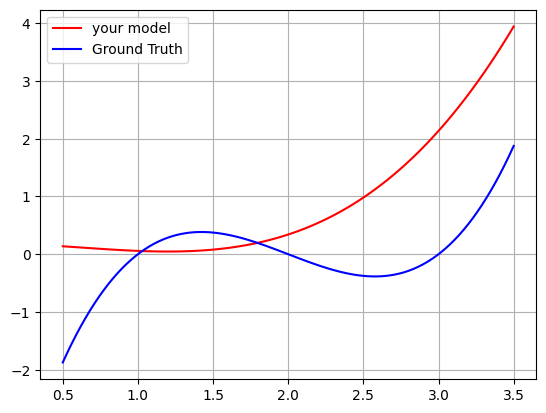

In [6]:
def plot_model(model):
    with torch.no_grad():
        #################################

        # Enter your code
        y_hat = model(train_data.x_data)
        #################################

    plt.plot(x, y_hat, color='red', label='your model')
    plt.plot(x, y, color='blue', label='Ground Truth')
    plt.grid()
    plt.legend()
    plt.show()

print("your initial model: ", model.state_dict())
plot_model(model)

**Define Loss and optimizer**

We set mean square error loss as the loss function\
and use Adam Optimization as the optimizer for the model.

In simple term, Adam Optimization is a variant of SGD (sotchastic gradient descent). We won't handle the details for the optimizer in this class.\
Those who are curious about this can refer to [here](https://medium.com/mlearning-ai/optimizers-in-deep-learning-7bf81fed78a0).

![picture](https://miro.medium.com/v2/resize:fit:640/1*XVFmo9NxLnwDr3SxzKy-rA.gif)


In [7]:
loss_function = nn.MSELoss()

optimizer = optim.Adam(params=model.parameters(), lr=0.01)

**Train your model**

Epoch:  500  / Loss:  0.20399503  /model parameter:  OrderedDict([('linear.weight', tensor([[ 1.7077, -0.9375,  0.1799]])), ('linear.bias', tensor([-1.1841]))])
Epoch:  1000  / Loss:  0.15365584  /model parameter:  OrderedDict([('linear.weight', tensor([[ 3.0633, -1.6760,  0.3029]])), ('linear.bias', tensor([-1.8960]))])
Epoch:  1500  / Loss:  0.10339333  /model parameter:  OrderedDict([('linear.weight', tensor([[ 4.3442, -2.3791,  0.4130]])), ('linear.bias', tensor([-2.5616]))])
Epoch:  2000  / Loss:  0.08574782  /model parameter:  OrderedDict([('linear.weight', tensor([[ 5.5357, -3.0272,  0.5207]])), ('linear.bias', tensor([-3.1748]))])
Epoch:  2500  / Loss:  0.044699617  /model parameter:  OrderedDict([('linear.weight', tensor([[ 6.6620, -3.6406,  0.6168]])), ('linear.bias', tensor([-3.7530]))])
Epoch:  3000  / Loss:  0.030959481  /model parameter:  OrderedDict([('linear.weight', tensor([[ 7.6962, -4.2018,  0.7120]])), ('linear.bias', tensor([-4.2933]))])
Epoch:  3500  / Loss:  0.01

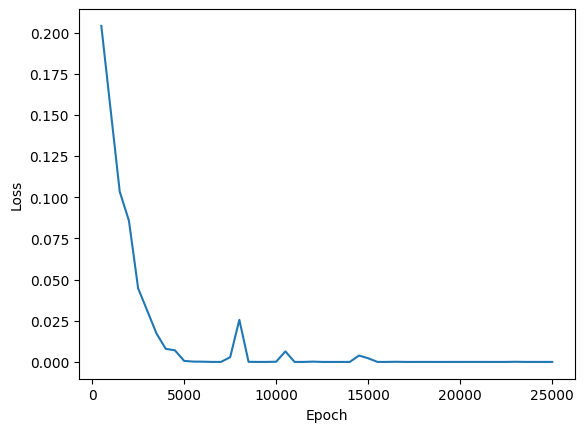

In [8]:
train_epochs = 25000
loss_list = []
epoch_list = []

for epoch in range(train_epochs):
    average_loss = []
    steps = 0

    for i, (x_train, y_train) in enumerate(train_loader):
        pred = model(x_train)
        loss = loss_function(pred, y_train)
        average_loss.append(loss.detach().numpy())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch+1) % 500 == 0:
        print('Epoch: ',  epoch+1, ' / Loss: ', np.mean(average_loss), ' /model parameter: ', model.state_dict())
        loss_list.append(np.mean(average_loss))
        epoch_list.append(epoch+1)

plt.plot(epoch_list, loss_list, label='train_loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

Trained model:  OrderedDict([('linear.weight', tensor([[10.9991, -5.9995,  1.0000]])), ('linear.bias', tensor([-5.9997]))])


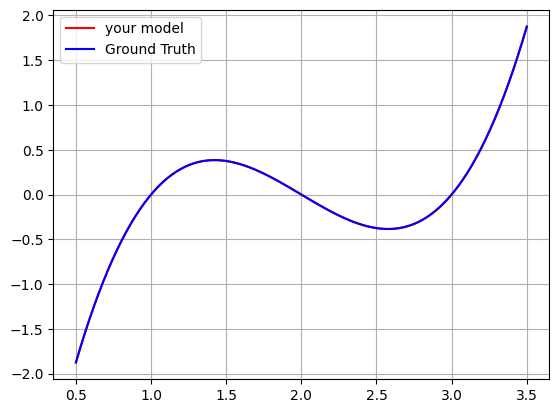

In [9]:
print("Trained model: ", model.state_dict())
plot_model(model)

## References
https://pytorch.org/docs/stable/index.html

https://www.simplilearn.com/keras-vs-tensorflow-vs-pytorch-article

https://www.assemblyai.com/blog/pytorch-vs-tensorflow-in-2023/

https://github.com/wkentaro/pytorch-for-numpy-users

https://www.baeldung.com/cs/convolutional-vs-regular-nn

https://medium.com/mlearning-ai/optimizers-in-deep-learning-7bf81fed78a0